In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vdyn.tracks.track import CenterlineTrack
from vdyn.models.bicycle_kinematic import KinematicBicycle

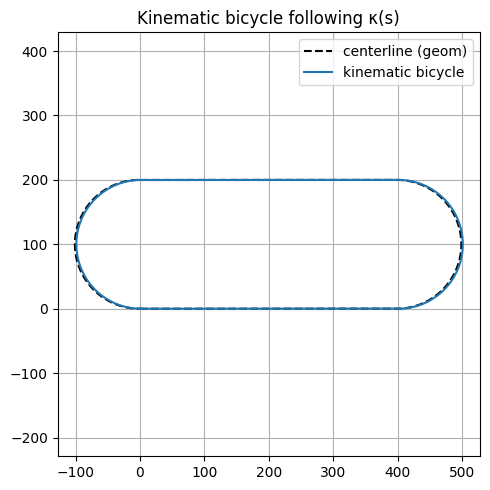

In [12]:
trk = CenterlineTrack.from_csv("../data/closed_oval_track.csv")
car = KinematicBicycle(wheelbase_m=2.8)

dt = 0.01
x=y=psi=0.0
v   = 30.0           
ax  = 0.0

X=[x]; Y=[y]
s = 0.0
while s < trk.L:
    kappa = trk.sample_kappa(s)
    delta = car.delta_for_curvature(kappa)
    x, y, psi, v = car.step(x, y, psi, v, ax, delta, dt)
    X.append(x); Y.append(y)
    s += v*dt

# overlay centerline for the same distance
S = np.linspace(0, trk.L, 500)   
cx, cy = trk.sample_xy(S)

plt.figure(figsize=(5,5))
plt.plot(cx, cy, 'k--', label='centerline (geom)')
plt.plot(X, Y,  label='kinematic bicycle')
plt.axis('equal'); plt.grid(True); plt.legend()
plt.title("Kinematic bicycle following κ(s)")
plt.tight_layout()